In [3]:
import pandas as pd

# Load the uploaded dataset
file_path = r'vegetables_prices_additional_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   State        100000 non-null  object 
 1   District     100000 non-null  object 
 2   Market       100000 non-null  object 
 3   Vegetable    100000 non-null  object 
 4   Min_Price    100000 non-null  float64
 5   Max_Price    100000 non-null  float64
 6   Modal_Price  100000 non-null  float64
 7   Date         100000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


(           State    District         Market Vegetable  Min_Price  Max_Price  \
 0  Uttar Pradesh     Lucknow    City Market     Beans      12.22      17.99   
 1         Kerala   Alappuzha    Main Market    Tomato      21.73      23.96   
 2        Gujarat   Ahmedabad  Retail Market    Tomato      43.30      46.71   
 3    West Bengal  Darjeeling    City Market    Carrot      13.52      19.62   
 4      Rajasthan      Jaipur  Retail Market    Carrot      47.77      57.55   
 
    Modal_Price        Date  
 0        17.63   10/4/2015  
 1        22.62   2/13/2022  
 2        44.39   11/9/2022  
 3        13.96  10/11/2010  
 4        48.12   7/20/2021  ,
 None)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid dates (if any)
data = data.dropna(subset=['Date'])

# Encode categorical variables
label_encoders = {}
for col in ['State', 'District', 'Market', 'Vegetable']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target
X = data[['State', 'District', 'Market', 'Vegetable', 'Min_Price', 'Max_Price']]
y = data['Modal_Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summary of prepared data
X_train.head(), y_train.head()

(       State  District  Market  Vegetable  Min_Price  Max_Price
 75220      4        31       0          6      49.21      57.61
 48955      5        14       1          0      32.47      39.61
 44966      1        32       2          6      15.14      22.11
 13568      1        38       0          0      41.99      46.24
 92727      9        24       2          4      22.71      27.36,
 75220    54.17
 48955    32.64
 44966    21.96
 13568    43.96
 92727    25.57
 Name: Modal_Price, dtype: float64)

In [3]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = {"R²": r2, "MAE": mae}

# Display the results
results

{'Decision Tree': {'R²': 0.9635210220366771, 'MAE': 1.86503675},
 'Random Forest': {'R²': 0.9808580966091205, 'MAE': 1.4078955883333333},
 'Gradient Boosting': {'R²': 0.9822262868253884, 'MAE': 1.3751493610592291}}

In [4]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define a custom accuracy function for regression
def accuracy_score_regression(y_true, y_pred, tolerance=0.1):
    """
    Calculates accuracy as the percentage of predictions within a tolerance of the true value.
    :param y_true: Actual target values
    :param y_pred: Predicted target values
    :param tolerance: Fractional tolerance, e.g., 0.1 for 10%
    :return: Accuracy as a percentage
    """
    within_tolerance = abs(y_true - y_pred) <= tolerance * abs(y_true)
    return 100 * (within_tolerance.sum() / len(y_true))

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    accuracy = accuracy_score_regression(y_test, predictions, tolerance=0.1)
    results[name] = {"R²": r2, "MAE": mae, "Accuracy (%)": accuracy}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.2f}")


Decision Tree:
  R²: 0.96
  MAE: 1.87
  Accuracy (%): 74.44
Random Forest:
  R²: 0.98
  MAE: 1.41
  Accuracy (%): 83.14
Gradient Boosting:
  R²: 0.98
  MAE: 1.38
  Accuracy (%): 84.02


In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ARIMA Model Training and Evaluation
def train_arima(y_train, y_test, order):
    """
    Train an ARIMA model and evaluate on test data.
    :param y_train: Training time series data
    :param y_test: Testing time series data
    :param order: ARIMA order (p, d, q)
    :return: Dictionary with evaluation metrics
    """
    # Fit ARIMA model
    model = ARIMA(y_train, order=order)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.forecast(steps=len(y_test))

    # Calculate metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    return {"R²": r2, "MAE": mae, "MSE": mse, "Predictions": predictions}

# Define ARIMA order (example: p=2, d=1, q=2)
arima_order = (2, 1, 2)

# Train and evaluate ARIMA
arima_results = train_arima(y_train, y_test, arima_order)

# Display results
print("ARIMA Results:")
for metric, value in arima_results.items():
    if metric != "Predictions":
        print(f"  {metric}: {value:.2f}")


/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model

ARIMA Results:
  R²: -0.00
  MAE: 11.34
  MSE: 173.61


/var/folders/7n/4fvlvrs96r14dtbqvxqn_mqh0000gn/T/ipykernel_20038/4083247036.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/7n/4fvlvrs96r14dtbqvxqn_mqh0000gn/T/ipykernel_20038/4083247036.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/7n/4fvlvrs96r14dtbqvxqn_mqh0000gn/T/ipykernel_20038/4083247036.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/7n/4fvlvrs96r14dtbqvxqn_mqh0000gn/T/ipykernel_20038/4083247036.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/7n/4fvlvrs96r14dtbqvxqn_mqh0000gn/T/ipykernel_20038/4083247036.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/7n/4fvlvrs96r14dtbqvxqn_mqh0000gn/T/ipykernel_20038/4083247036.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


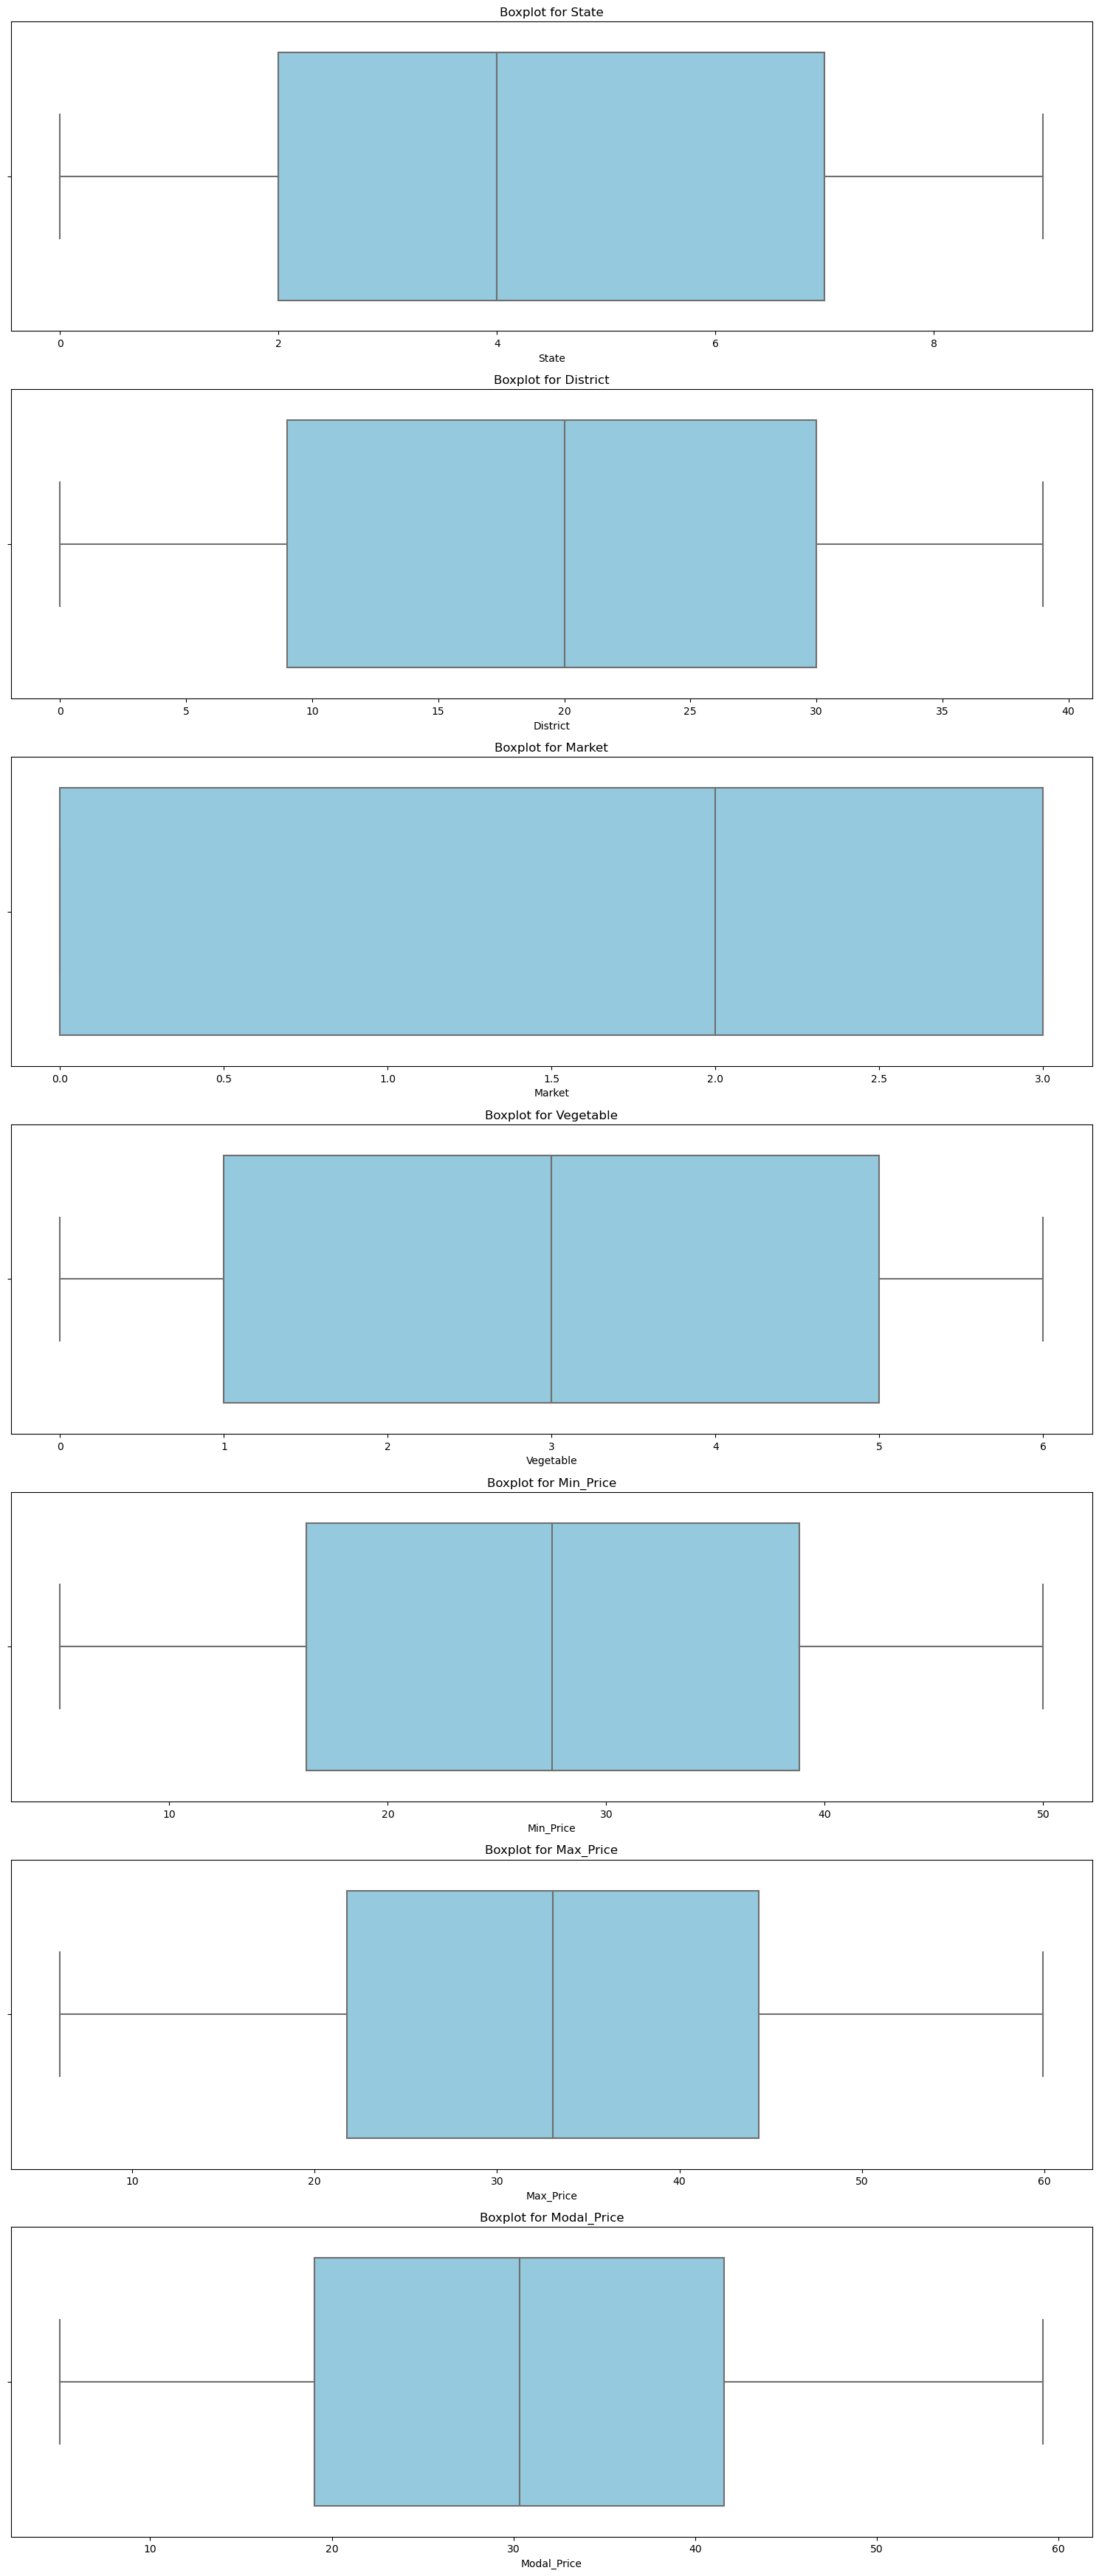

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine X_train and y_train for visualization (assuming X_train is a DataFrame)
train_data = X_train.copy()
train_data['Modal_Price'] = y_train

# Function to plot boxplots for each column in the DataFrame
def plot_boxplots(data, features=None):
    """
    Generates boxplots for detecting outliers in each feature.
    :param data: Pandas DataFrame containing features and target.
    :param features: List of features to plot. If None, all numeric features are plotted.
    """
    if features is None:
        features = data.columns

    plt.figure(figsize=(15, 5 * len(features)))
    for i, feature in enumerate(features, 1):
        plt.subplot(len(features), 1, i)
        sns.boxplot(data=data, x=feature, color='skyblue')
        plt.title(f'Boxplot for {feature}')
        plt.xlabel(feature)
        plt.tight_layout()

# Call the function to plot boxplots for features and the target
plot_boxplots(train_data, features=train_data.columns)
plt.show()


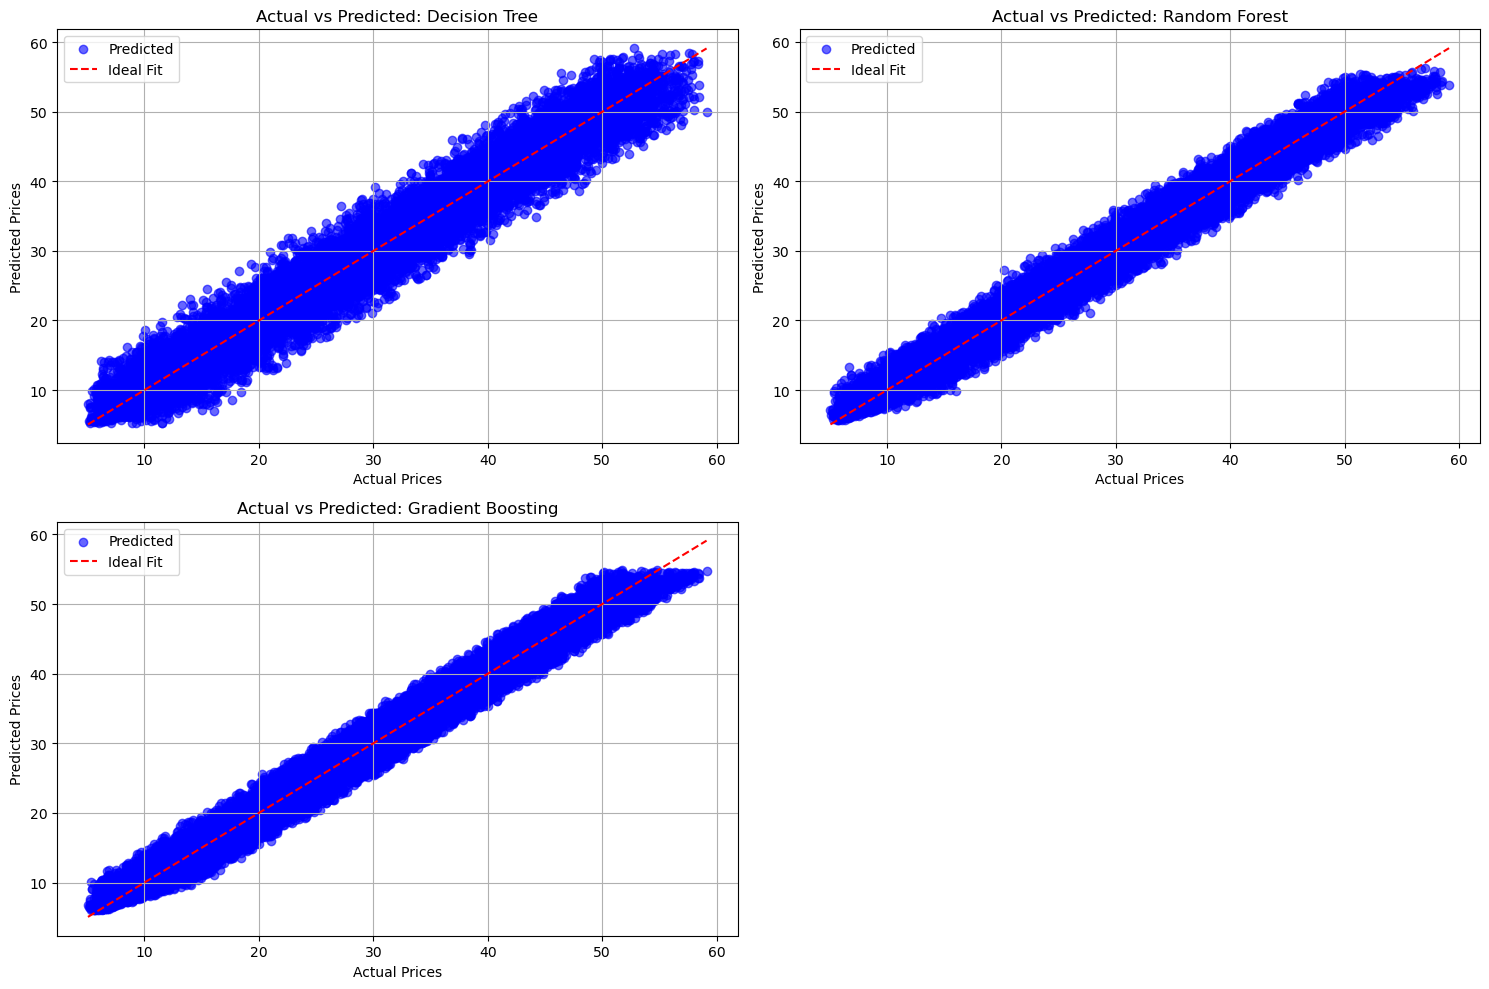

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Actual vs Predicted for each model
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    # Generate predictions
    predictions = model.predict(X_test)
    
    # Plotting
    plt.subplot(2, 2, i)
    plt.scatter(y_test, predictions, alpha=0.6, label="Predicted", color="blue")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Ideal Fit")
    plt.title(f"Actual vs Predicted: {name}")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [8]:
y_train.index = pd.RangeIndex(len(y_train))
y_test.index = pd.RangeIndex(len(y_test))


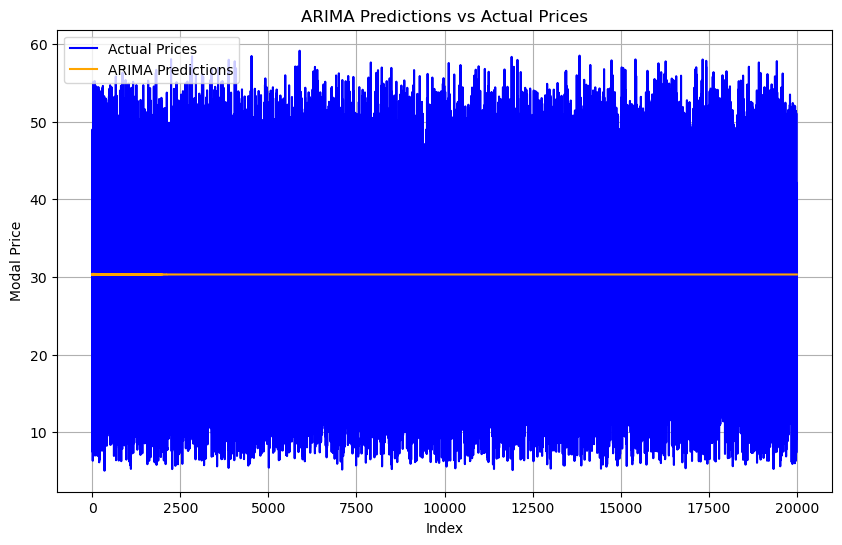

In [9]:
# Line Plot for ARIMA Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(arima_results['Predictions'])), arima_results['Predictions'], label="ARIMA Predictions", color="orange")
plt.title("ARIMA Predictions vs Actual Prices")
plt.xlabel("Index")
plt.ylabel("Modal Price")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
data = data.sort_values(by='Date')
data.set_index('Date', inplace=True)


In [11]:
from pmdarima import auto_arima
optimal_order = auto_arima(y_train, seasonal=False).order
print(f"Optimal ARIMA order: {optimal_order}")


Optimal ARIMA order: (0, 0, 0)


In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Ensure chronological indexing
data = data.sort_values(by='Date')
data.set_index('Date', inplace=True)

# Use only the target column for ARIMA (e.g., Modal_Price)
y = data['Modal_Price']

# Train-Test Split (80% train, 20% test chronologically)
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]

# Define and fit ARIMA
model = ARIMA(y_train, order=(2, 1, 2))
model_fit = model.fit()

# Forecast for the test period
predictions = model_fit.forecast(steps=len(y_test))

# Evaluate predictions
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"ARIMA Performance:\nR²: {r2:.2f}, MAE: {mae:.2f}, MSE: {mse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_test.index, predictions, label="Predicted", color="orange")
plt.title("ARIMA Predictions vs Actuals")
plt.legend()
plt.grid(True)
plt.show()


KeyError: "None of ['Date'] are in the columns"

In [15]:
print(data.columns)


Index(['State', 'District', 'Market', 'Vegetable', 'Min_Price', 'Max_Price',
       'Modal_Price'],
      dtype='object')


In [35]:
# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify again
print(data.columns)


Index(['State', 'District', 'Market', 'Vegetable', 'Min_Price', 'Max_Price',
       'Modal_Price', 'Date'],
      dtype='object')


In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Predict on test data
    r2 = r2_score(y_test, predictions)  # Calculate R^2 score
    mae = mean_absolute_error(y_test, predictions)  # Calculate MAE
    results[name] = {"R²": r2, "MAE": mae}  # Store results

# Display results
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.2f}")


Decision Tree:
  R²: 0.96
  MAE: 1.87
Random Forest:
  R²: 0.98
  MAE: 1.41
Gradient Boosting:
  R²: 0.98
  MAE: 1.38


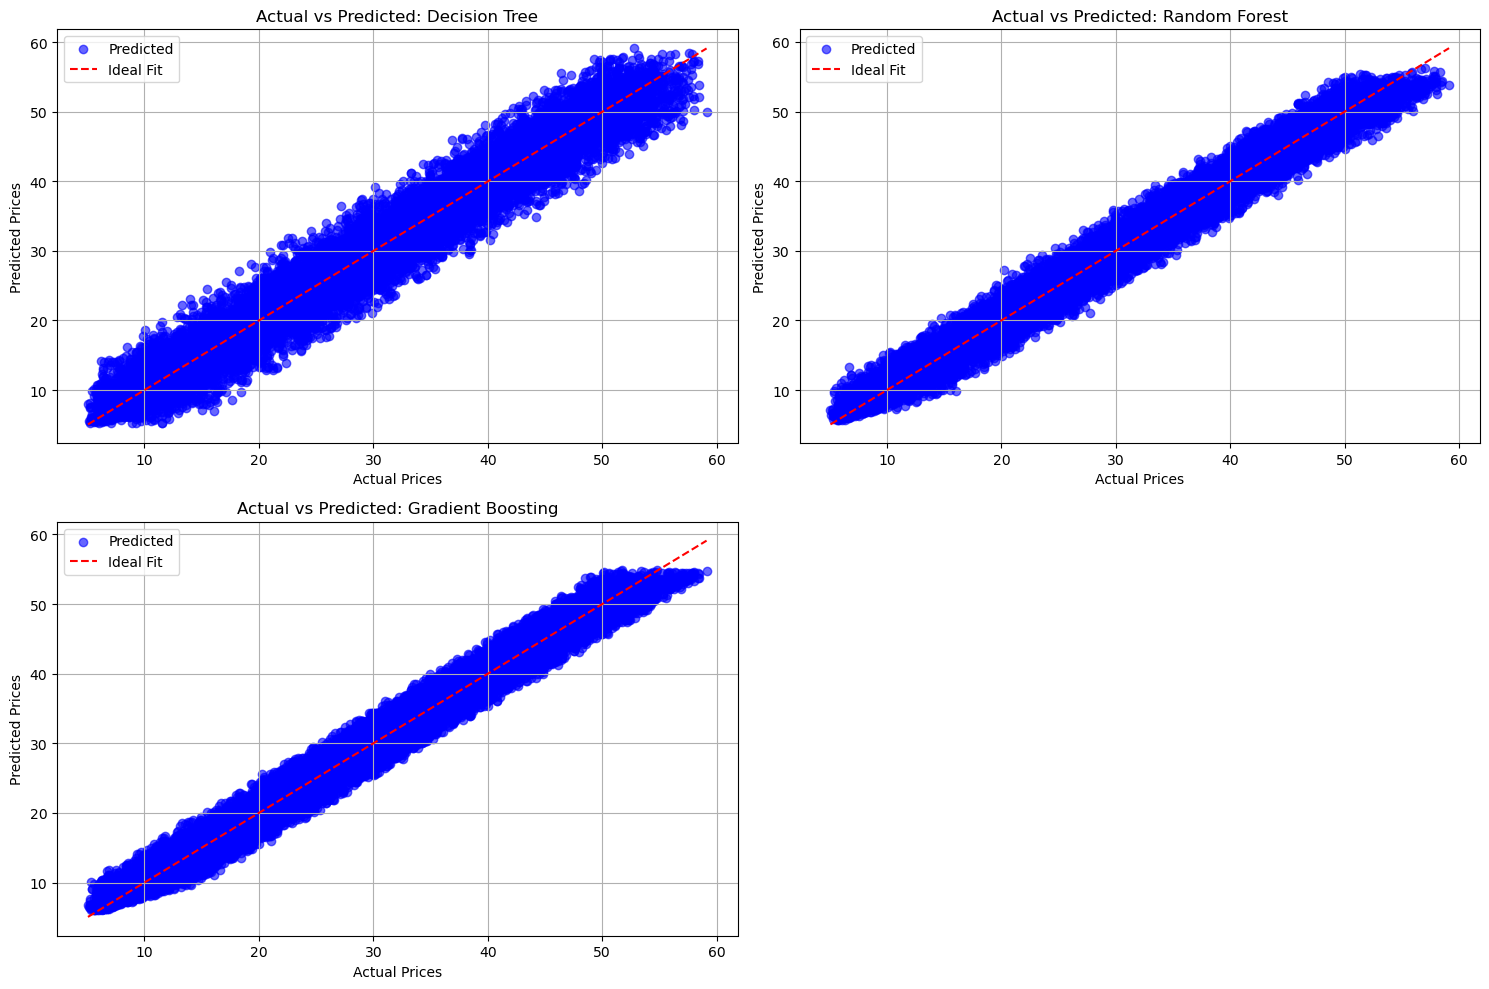

In [21]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for each model
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    predictions = model.predict(X_test)
    
    plt.subplot(2, 2, i)
    plt.scatter(y_test, predictions, alpha=0.6, label="Predicted", color="blue")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Ideal Fit")
    plt.title(f"Actual vs Predicted: {name}")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have already set Date as index and your data is sorted
# Use only the target column for ARIMA
y = data['Modal_Price']

# Split the time series into train and test
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# ARIMA Model Training and Evaluation
def train_arima(y_train, y_test, order):
    model = ARIMA(y_train, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(y_test))
    
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    return {"R²": r2, "MAE": mae, "MSE": mse, "Predictions": predictions}

# Define ARIMA order (e.g., (2,1,2))
arima_order = (2, 1, 2)
arima_results = train_arima(train, test, arima_order)

# Display results
print("ARIMA Results:")
for metric, value in arima_results.items():
    if metric != "Predictions":
        print(f"  {metric}: {value:.2f}")


/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

ARIMA Results:
  R²: -0.00
  MAE: 11.41
  MSE: 174.81


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'vegetable_price_model.pkl')

# Load the model
model = joblib.load('vegetable_price_model.pkl')

# Predict using the loaded model
predictions = model.predict(X_test)


In [25]:
data.head()

,State,District,Market,Vegetable,Min_Price,Max_Price,Modal_Price
Date,,,,,,,
2009-11-22,4,27,3,5,8.05,11.92,10.19
2009-11-22,6,13,3,2,47.42,49.96,48.23
2009-11-22,6,2,3,3,32.16,39.64,37.38
2009-11-22,0,10,3,0,30.09,38.62,34.70
2009-11-22,9,9,1,6,18.09,20.05,19.98


/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25403D+00    |proj g|=  7.68357D-02

At iterate    5    f=  4.11865D+00    |proj g|=  3.75009D-02

At iterate   10    f=  4.00139D+00    |proj g|=  2.34179D-03

At iterate   15    f=  4.00114D+00    |proj g|=  1.06880D-02

At iterate   20    f=  3.99879D+00    |proj g|=  3.42823D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     40      1     0     0   6.571D-03   3.999D+00
  F =   3.9987636807553071     

CONVERG

/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/abhiksarkar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA Results:
  R²: -0.00
  MAE: 11.42
  MSE: 175.08


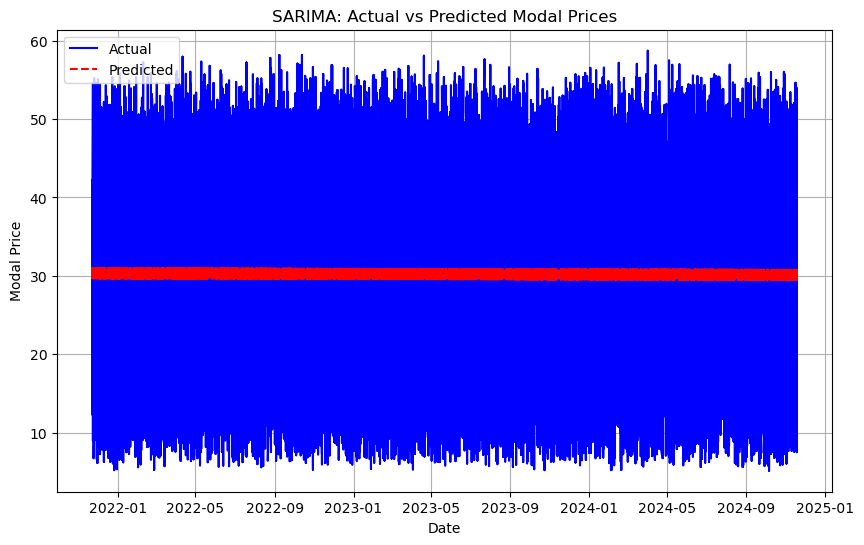

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Ensure that 'Date' is set as the index and the data is sorted
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data.set_index('Date', inplace=True)
data = data.sort_index()

# Use only the 'Modal_Price' column for SARIMA
y = data['Modal_Price']

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# SARIMA Model Training
# Define SARIMA order (p, d, q) and seasonal order (P, D, Q, m)
# Here m=12 assuming monthly data with yearly seasonality
sarima_order = (1, 1, 1)  # p, d, q (AR, differencing, MA)
seasonal_order = (1, 1, 1, 12)  # P, D, Q, m (Seasonal AR, differencing, MA, seasonal cycle length)

# Train the SARIMA model
model = SARIMAX(train, order=sarima_order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecast on test data
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model performance
r2 = r2_score(test, predictions)
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)

print(f"SARIMA Results:")
print(f"  R²: {r2:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('SARIMA: Actual vs Predicted Modal Prices')
plt.xlabel('Date')
plt.ylabel('Modal Price')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Assuming the correct column name is 'date' (adjust accordingly)
data.head()

,State,District,Market,Vegetable,Min_Price,Max_Price,Modal_Price,Date
0,8,20,0,0,12.22,17.99,17.63,2015-10-04
1,3,3,1,6,21.73,23.96,22.62,2022-02-13
2,1,1,2,6,43.30,46.71,44.39,2022-11-09
3,9,9,0,3,13.52,19.62,13.96,2010-10-11
4,6,13,2,3,47.77,57.55,48.12,2021-07-20


In [2]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Example dataset or prediction logic
def predict_price(data):
    # Replace this with your actual prediction logic
    return {"predicted_price": 100.0, "message": "Prediction successful"}

@app.route('/predict', methods=['POST'])
def predict():
    form_data = request.json  # Receive JSON data from the frontend
    commodity = form_data.get("commodity")
    state = form_data.get("state")
    district = form_data.get("district")
    city = form_data.get("city")
    market = form_data.get("market")
    variety = form_data.get("variety")
    date = form_data.get("date")

    # Perform prediction using your logic
    prediction = predict_price({
        "commodity": commodity,
        "state": state,
        "district": district,
        "city": city,
        "market": market,
        "variety": variety,
        "date": date
    })

    return jsonify(prediction)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
On macOS, try disabling the 'AirPlay Receiver' service from System Preferences -> General -> AirDrop & Handoff.


AttributeError: 'tuple' object has no attribute 'tb_frame'